***

# <center> Data Project 1

***

    
### The goal for this project is to use a Kaggle dataset on two crypto currencies (Bitcoin and Ethereum) and visualize some key features about the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler

***

# Load in the Crypto Currency data from Kaggle

We gathered the data from Coinmarketcap a free API source

The data we will be observing from each coin is:

- Date : Date of observation
- Symbol : Investment symbol of the currency
- Open : Opening price on the given day
- High : Highest price on the given day
- Low : Lowest price on the given day
- Close : Closing price on the given day
- Volume : Volume of transactions on the given day
- Market Cap : Market capitalization in USD

***

## Bitcoin

In [2]:
#Reading in the cvs file with all the data and transforming Date into a Float Variable
BTC = pd.read_csv('coin_Bitcoin.csv', parse_dates = ['Date'])

In [3]:
#Dropping Names column 
BTC.drop(columns = "Name", inplace = True)

#Dropping Symbol column 
#BTC.drop(columns = "Symbol", inplace = True)

#Drop Sno (Sno is like an id variable)
#Since it is a time series data set we can use the 'Date' variable to act as an id/index varibale

BTC.drop(columns = "Sno", inplace = True)

#Drop BTC obeservations where Volume = 0 
#We had some missing values for 'Volume'
BTC.drop(BTC.index[BTC['Volume'] == 0], inplace = True)


In [4]:
#print(BTC.head(10))

In [5]:
#print(BTC.tail(10))

In [6]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2749 entries, 242 to 2990
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Symbol     2749 non-null   object        
 1   Date       2749 non-null   datetime64[ns]
 2   High       2749 non-null   float64       
 3   Low        2749 non-null   float64       
 4   Open       2749 non-null   float64       
 5   Close      2749 non-null   float64       
 6   Volume     2749 non-null   float64       
 7   Marketcap  2749 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 193.3+ KB


### Bitcoin
- We have 2749 observations
- Data ranges from Dec. 27, 2015 to July 6, 2021

***

## Ethereum

In [7]:
#reading in the Eth data from a csv file and parsing the dates to make them a float varibale
ETH = pd.read_csv('coin_Ethereum.csv', parse_dates = ['Date'])

In [8]:
#Dropping Names column 
ETH.drop(columns = "Name", inplace = True)

#Dropping Symbol column 
#ETH.drop(columns = "Symbol", inplace = True)

#Drop 'Sno' which is an id varibale for each observation
ETH.drop(columns = "SNo", inplace = True)

In [9]:
#print(ETH.head())

In [10]:
#print(ETH.tail())

In [11]:
ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Symbol     2160 non-null   object        
 1   Date       2160 non-null   datetime64[ns]
 2   High       2160 non-null   float64       
 3   Low        2160 non-null   float64       
 4   Open       2160 non-null   float64       
 5   Close      2160 non-null   float64       
 6   Volume     2160 non-null   int64         
 7   Marketcap  2160 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 135.1+ KB


### Ethereum
- We have 2160 observations
- We have data from July 8, 2015 to June 6, 2021

***

# Summary Statistics
## Bitcoin

In [12]:
BTC.describe().T

,count,mean,std,min,25%,50%,75%,max
High,2749.0,7.477294e+03,1.196953e+04,2.117310e+02,5.082200e+02,3.743388e+03,9.164362e+03,6.486310e+04
Low,2749.0,7.036728e+03,1.117069e+04,1.715100e+02,4.829520e+02,3.619182e+03,8.727090e+03,6.220896e+04
Open,2749.0,7.268362e+03,1.160357e+04,1.768970e+02,4.954550e+02,3.671370e+03,8.912524e+03,6.352375e+04
Close,2749.0,7.280272e+03,1.161379e+04,1.781030e+02,4.956660e+02,3.671204e+03,8.909954e+03,6.350346e+04
Volume,2749.0,1.186644e+10,1.941175e+10,2.857830e+06,4.872260e+07,2.219410e+09,1.757206e+10,3.509680e+11
Marketcap,2749.0,1.312580e+11,2.169847e+11,2.444379e+09,6.944861e+09,6.406376e+10,1.589500e+11,1.186360e+12


### Bitcoin Close values 
- The average 'close' value over the 6 year period is 7,280 with a minimum value of 1,781 and a max value of 63,503
- The standard deviation for 'close' prices are 11,614


In [13]:
#generate a scaler variable, we might not use this bc we can manually convert each variable to the logged value
#scaler doesnt seem to like the date variable and I don't want to drop it and lose the time-series index element of the data
scaler=StandardScaler()

In [14]:
# apply log(x+1) to values in float columns
to_log = ['High', 'Low', 'Open', 'Close', 'Volume', "Marketcap"]
BTC_log = BTC[to_log].applymap(lambda x: np.log(x+1))
    

In [15]:
print(BTC_log.head(10))

#looks like the log transformation worked

         High       Low      Open     Close     Volume  Marketcap
242  6.657382  6.571723  6.638934  6.601325  17.662733  22.915522
243  6.617483  6.560111  6.605271  6.591441  17.296929  22.905931
244  6.619553  6.572898  6.591742  6.614793  16.760544  22.929572
245  6.643269  6.608324  6.609821  6.629535  16.846016  22.944334
246  6.635395  6.605528  6.635054  6.626731  16.855131  22.941526
247  6.654603  6.628002  6.628002  6.649503  16.928555  22.964327
248  6.710901  6.644063  6.652140  6.688840  17.465896  23.003715
249  6.727611  6.672185  6.689413  6.708963  17.448087  23.023862
250  6.757525  6.687944  6.714498  6.757525  17.453228  23.072483
251  6.860035  6.751709  6.756409  6.840044  18.104579  23.155093


High
Skew : 2.89


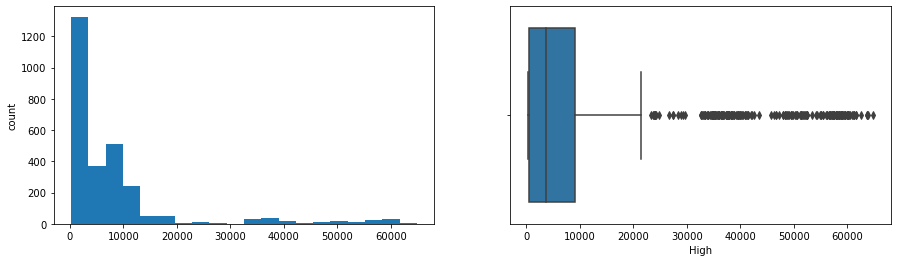

Low
Skew : 2.91


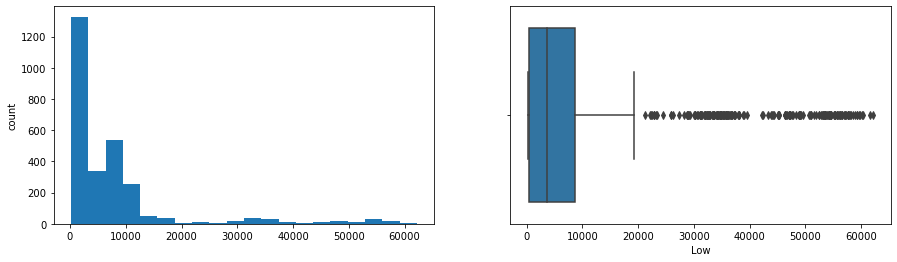

Open
Skew : 2.9


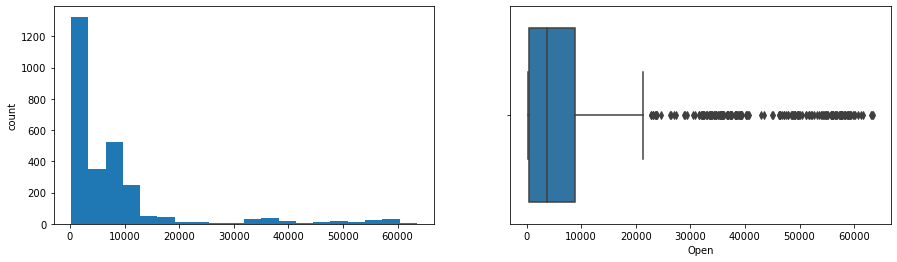

Close
Skew : 2.89


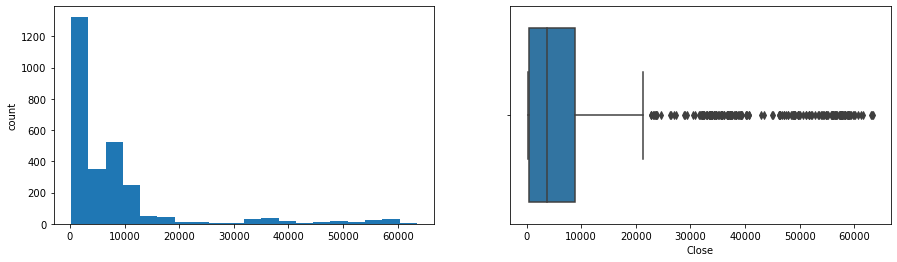

Volume
Skew : 3.62


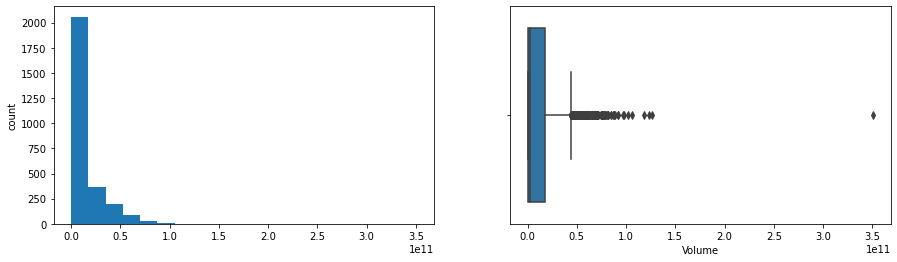

Marketcap
Skew : 2.94


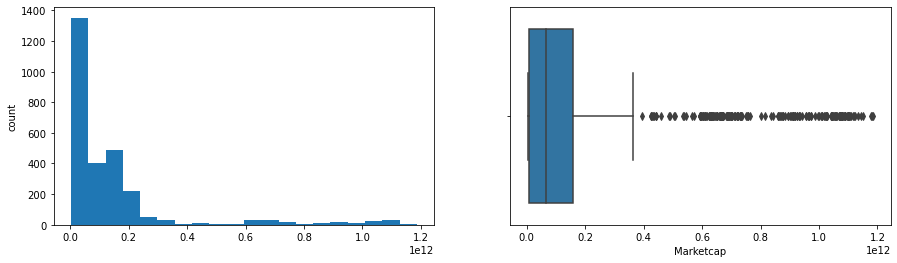

In [16]:
#Observe distribution for each numeric column, raw values
for col in BTC.columns[2:]:
    print(col)
    print('Skew :',round(BTC[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    BTC[col].hist(bins=20, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=BTC[col])
    plt.show()

High
Skew : 0.07


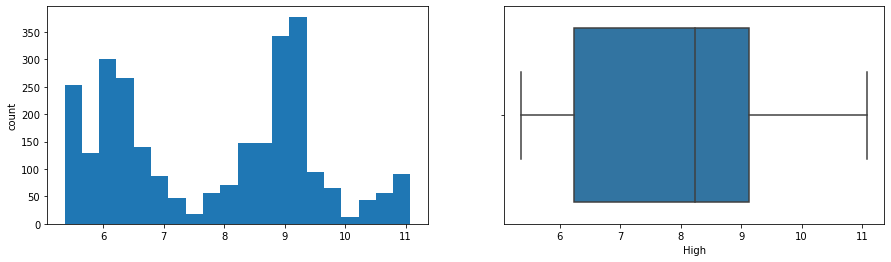

Low
Skew : 0.06


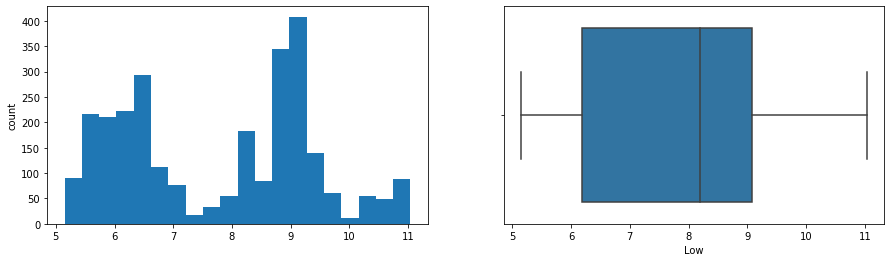

Open
Skew : 0.07


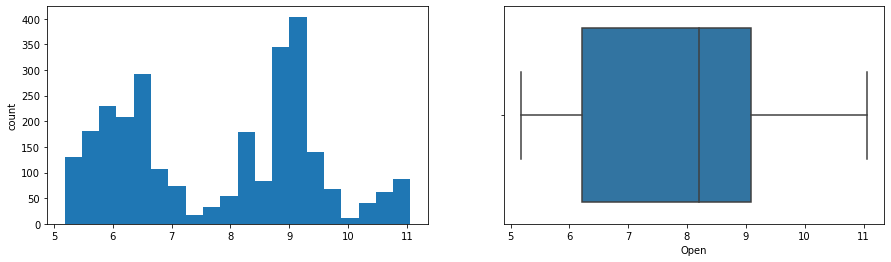

Close
Skew : 0.07


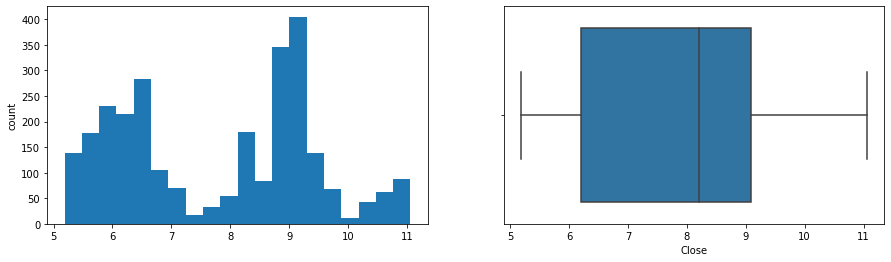

Volume
Skew : -0.11


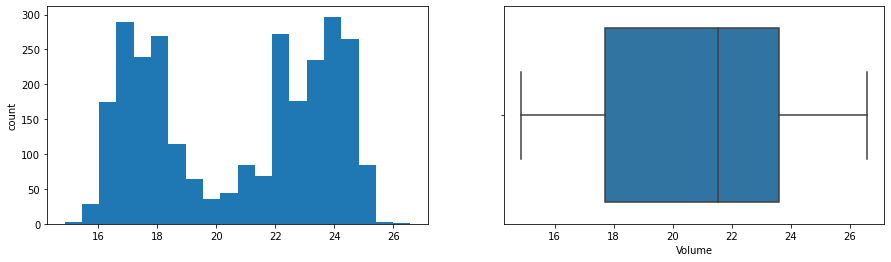

Marketcap
Skew : 0.05


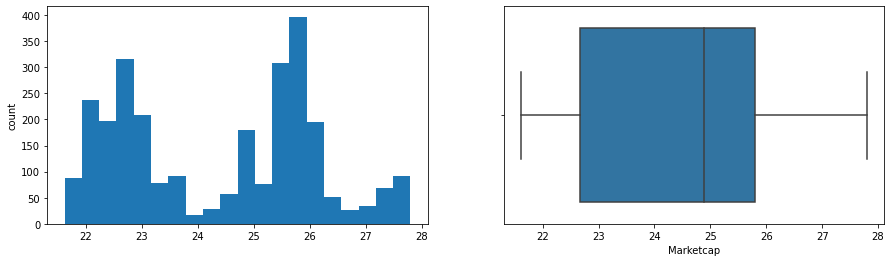

In [15]:
#Observe distribution for each numeric column, Log values
for col in BTC_log.columns[0:]:
    print(col)
    print('Skew :',round(BTC_log[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    BTC_log[col].hist(bins=20, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=BTC_log[col])
    plt.show()

### Raw Bitcoin vs Log Bitcoin
- In the raw data each vairbale has a significant right skew
- After converting the values to the logged values the box-plots looks more normal and the skew has practically vanished
- In the logged values' histogram we can see the distribution for each varibale forms a bimodial distribution
- In the raw data there is a huge outlire in 'Volume', lets try to fugure out what happened that day

In [17]:
BTC['Volume'].idxmax()
#use idmax command to find the id value where the 'Volume' was the highest and find which date the observation was from

2860

In [18]:
BTC.loc[2860:,]
#use loc to find the row, then observe the date with the mathcing id

,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
2860,BTC,2021-02-26,48370.78526,44454.84211,47180.46405,46339.76008,3.509680e+11,8.637520e+11
2861,BTC,2021-02-27,48253.27010,45269.02577,46344.77224,46188.45128,4.591095e+10,8.609780e+11
2862,BTC,2021-02-28,46716.43099,43241.61823,46194.01635,45137.77047,5.344389e+10,8.414290e+11
2863,BTC,2021-03-01,49784.01529,45115.09311,45159.50305,49631.24137,5.389130e+10,9.252360e+11
2864,BTC,2021-03-02,50127.50988,47228.84535,49612.10704,48378.98805,4.753090e+10,9.019340e+11
...,...,...,...,...,...,...,...,...
2986,BTC,2021-07-02,33939.58870,32770.68078,33549.60018,33897.04859,3.872897e+10,6.354510e+11
2987,BTC,2021-07-03,34909.25990,33402.69654,33854.42136,34668.54840,2.438396e+10,6.499400e+11
2988,BTC,2021-07-04,35937.56715,34396.47746,34665.56487,35287.77977,2.492431e+10,6.615750e+11
2989,BTC,2021-07-05,35284.34443,33213.66103,35284.34443,33746.00246,2.672155e+10,6.326960e+11


- Feburary 26, 2021 Bitcoin hit its largest volume trading day to date
- Seems the price stayed relatively stable so there wasn't a huge sell off or purchase

- According to Bitcoin's ledger it was a huge 24hrs for Bitcoin transactions 
    - 21,317 unique bitcoins traded wallets that day 
    - Market outlook that day seemed long on Bitcoin as the price grew the during the following week 
    - Feb 25, 2021 Bloomberg article mentioned Elon Musk vs Bill Gates stance on Bitcoin and crypto currencies 
    - Gates criticized Elon's move to invest 1.5 billion Tesla stock into Bitcoin

***

### Ethereum

In [19]:
ETH.describe().T

,count,mean,std,min,25%,50%,75%,max
High,2160.0,3.982586e+02,6.280823e+02,4.829880e-01,1.426522e+01,2.051246e+02,3.964946e+02,4.362351e+03
Low,2160.0,3.655926e+02,5.666115e+02,4.208970e-01,1.319095e+01,1.933027e+02,3.751468e+02,3.785849e+03
Open,2160.0,3.828799e+02,5.997199e+02,4.315890e-01,1.375760e+01,1.984251e+02,3.862649e+02,4.174636e+03
Close,2160.0,3.839107e+02,6.010788e+02,4.348290e-01,1.381920e+01,1.986437e+02,3.864353e+02,4.168701e+03
Volume,2160.0,7.057058e+09,1.064526e+10,1.021280e+05,3.825102e+07,2.148880e+09,9.629136e+09,8.448291e+10
Marketcap,2160.0,4.172084e+10,6.909183e+10,3.221363e+07,1.135576e+09,2.070063e+10,4.231010e+10,4.828820e+11


### Ethereum close values
- Over the 6 year period we see that the average 'close' price for Ethereum was 384 
- Minimum value of 43 and a Maximum value of 4,169
- Standard deviations for the 'close' values are 601

High
Skew : 2.98


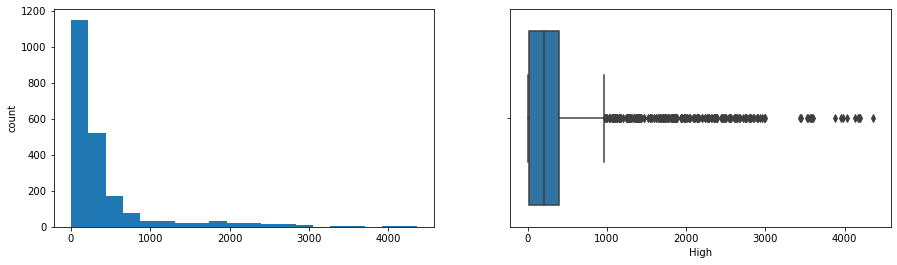

Low
Skew : 2.93


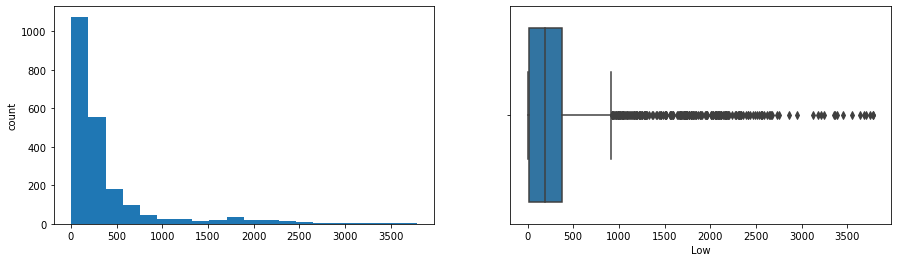

Open
Skew : 2.96


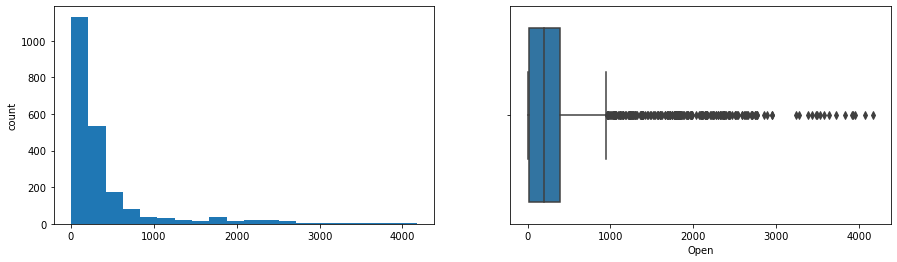

Close
Skew : 2.95


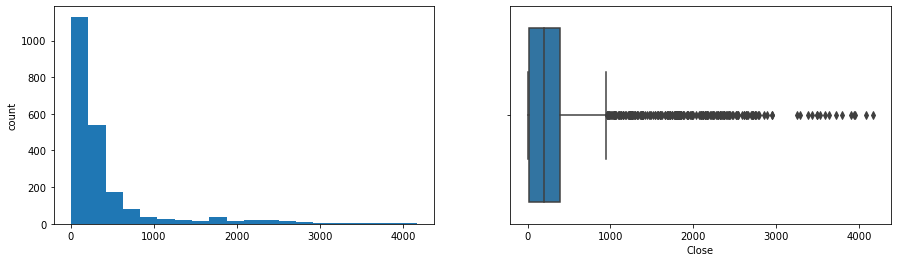

Volume
Skew : 2.44


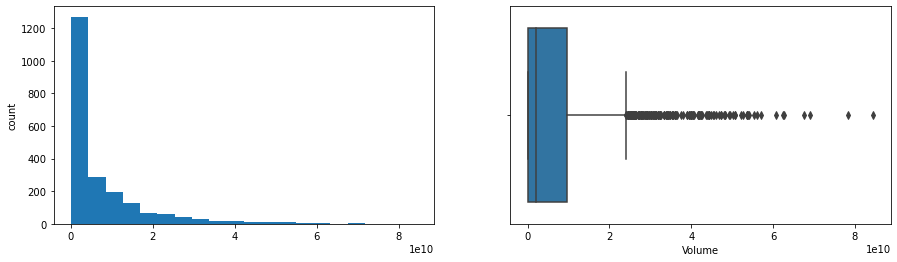

Marketcap
Skew : 3.1


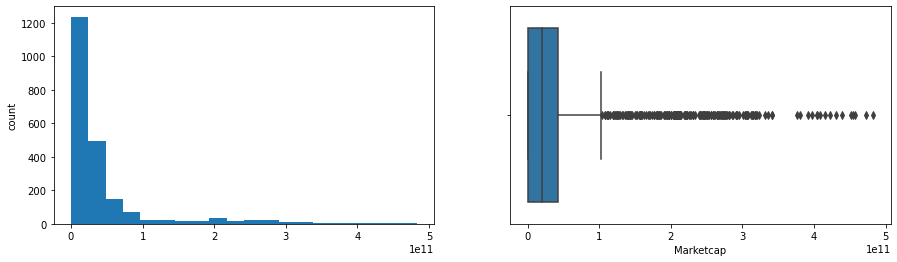

In [20]:
#Observe distribution for each numeric column, raw values
for col in ETH.columns[2:]:
    print(col)
    print('Skew :',round(ETH[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    ETH[col].hist(bins=20, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=ETH[col])
    plt.show()

In [21]:
# apply log(x+1) to values in float columns
to_log = ['High', 'Low', 'Open', 'Close', 'Volume', "Marketcap"]
ETH_log = ETH[to_log].applymap(lambda x: np.log(x+1))

In [22]:
#print(ETH_log.head())

#we now have logged values foe Ethereum

High
Skew : -0.66


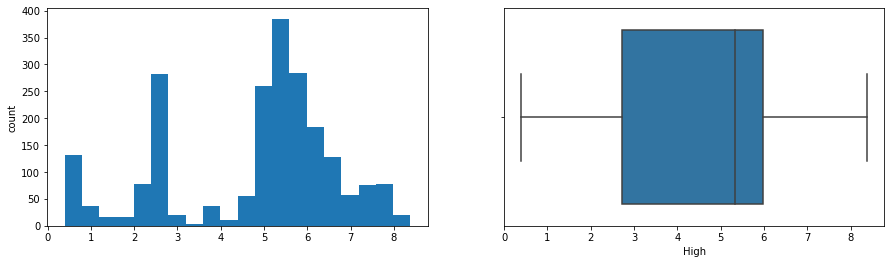

Low
Skew : -0.67


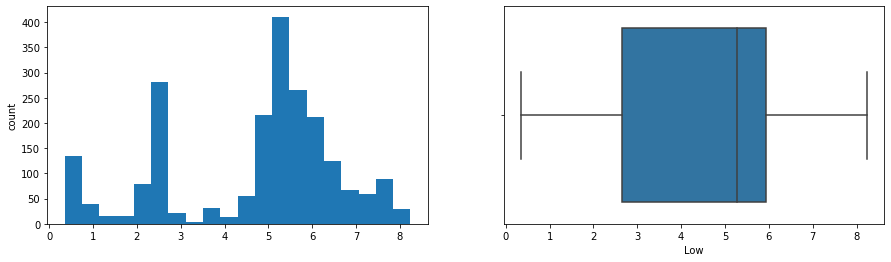

Open
Skew : -0.66


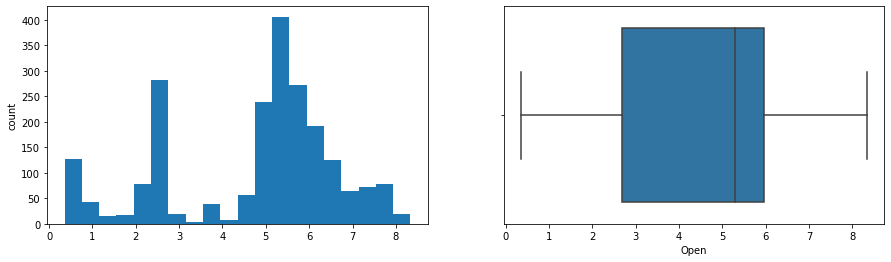

Close
Skew : -0.66


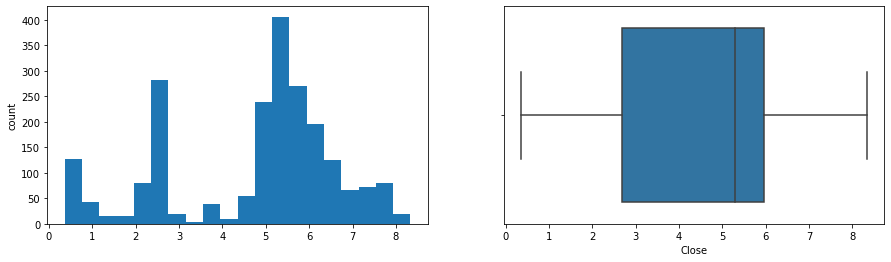

Volume
Skew : -0.86


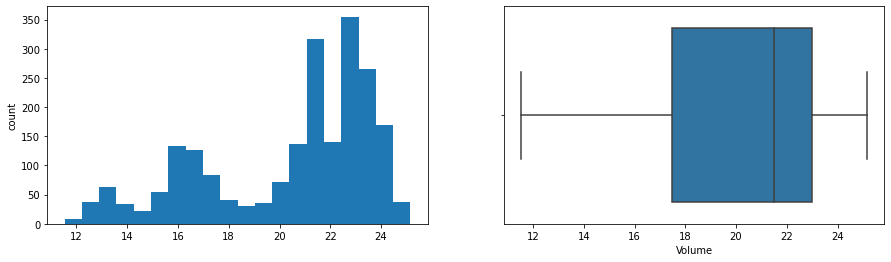

Marketcap
Skew : -0.86


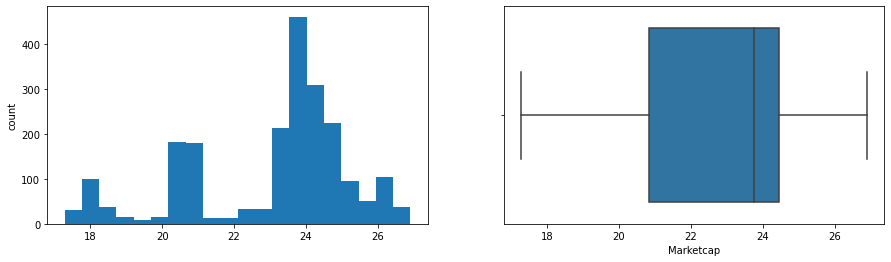

In [23]:
#Observe distribution for each numeric column, Log values
for col in ETH_log.columns[0:]:
    print(col)
    print('Skew :',round(ETH_log[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    ETH_log[col].hist(bins=20, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=ETH_log[col])
    plt.show()

### Raw ETH vs Log ETH
- We can see in the raw values for Ethereum the distribution is highly right skewed with no significant single outlires in each varibale
- For the logged values ETH forms some bimodial distributions as well as a seemingly left skewed distribution in Volume
- The box plots for logged ETH seem to be more approximatley normal

***

## Merge the datasets

#### To see how Bitcoin and Ethereum compare we will combine the dataframes

In [24]:
BTC_ETH = pd.concat([BTC, ETH])

In [25]:
#BTC_ETH.info()

## Plotting the data

In [26]:
BTC_ETH_wide_close = BTC_ETH.pivot("Date", "Symbol", "Close")
#print(BTC_ETH_wide_close.head())
BTC_ETH_wide_close.dropna(inplace = True)
print(BTC_ETH_wide_close.head())
BTC_ETH_wide_close.info()

Symbol             BTC       ETH
Date                            
2015-08-08  260.997009  0.753325
2015-08-09  265.083008  0.701897
2015-08-10  264.470001  0.708448
2015-08-11  270.385986  1.067860
2015-08-12  266.376007  1.217440
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2160 entries, 2015-08-08 to 2021-07-06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     2160 non-null   float64
 1   ETH     2160 non-null   float64
dtypes: float64(2)
memory usage: 50.6 KB


#### We then merged the two data sets using the close prices as the main level of price, we dropped the values of Ethereum where data was missing, we now have BTC and ETH close prices from July 8th 2015 to June 6th 2021

***

## Close Prices

<AxesSubplot:xlabel='Date'>

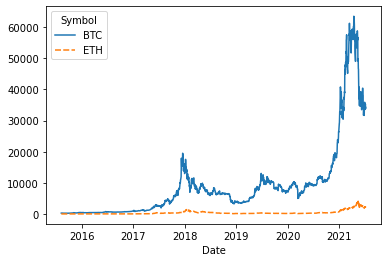

In [27]:
sns.lineplot(data=BTC_ETH_wide_close)

- This displays the daily 'close' prices for each coin
- Since the values of the two coins are widely spread we should take the log values for each coin in order to visuals the similarties

In [28]:
BTC_ETH_close_scaled=pd.DataFrame(scaler.fit_transform(BTC_ETH_wide_close), columns=BTC_ETH_wide_close.columns)
#BTC_ETH_close_scaled.head()

<AxesSubplot:>

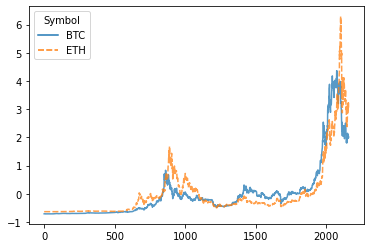

In [29]:
sns.lineplot(data=BTC_ETH_close_scaled, alpha = .75)

- After taking the logged close prices was observe the differences and similarties more clearly
- It seems the coins move together and the price of both coins are linked
- Ethereum seems to have larger and more frequent 'spikes' in prices leading me to believe Ethereum is a more volatile coin
- We can obeserve the volatilities for each coin later

***

## Market Volume

In [30]:
BTC_ETH_wide_volume = BTC_ETH.pivot("Date", "Symbol", "Volume")
BTC_ETH_wide_volume.dropna(inplace = True)
#BTC_ETH_wide_volume.head()

<AxesSubplot:xlabel='Date'>

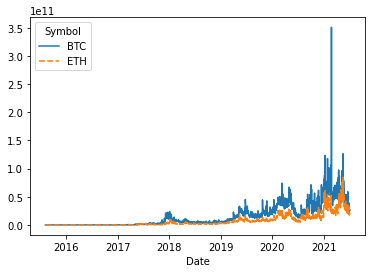

In [31]:
sns.lineplot(data=BTC_ETH_wide_volume)

#### Again we will take the logged values for each coin to get a more accurate comparison

In [32]:
BTC_ETH_volume_scaled=pd.DataFrame(scaler.fit_transform(BTC_ETH_wide_volume), columns=BTC_ETH_wide_volume.columns)
#BTC_ETH_volume_scaled.head()

<AxesSubplot:>

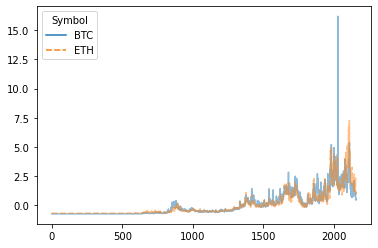

In [33]:
sns.lineplot(data=BTC_ETH_volume_scaled, alpha = .5)

- We can see that the 'Volume' traded for each coin are similar however Bitcoin has a much larger volume, i.e. more people are trading Bitcoin compared to Ethereum
- The large spike in Bitcoins Volume coincides with the date we observed before (Feb 26, 2021)

***

## Market Cap

In [34]:
BTC_ETH_wide_cap = BTC_ETH.pivot("Date", "Symbol", "Marketcap")
BTC_ETH_wide_cap.dropna(inplace = True)
#BTC_ETH_wide_cap.head()

<AxesSubplot:xlabel='Date'>

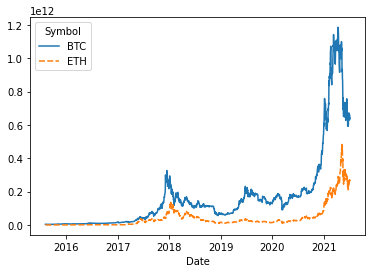

In [35]:
sns.lineplot(data=BTC_ETH_wide_cap)

- Now we will observe the logged values of each coin's 'Market Cap'

In [36]:
BTC_ETH_cap_scaled=pd.DataFrame(scaler.fit_transform(BTC_ETH_wide_cap), columns=BTC_ETH_wide_cap.columns)
#BTC_ETH_cap_scaled.head()

<AxesSubplot:>

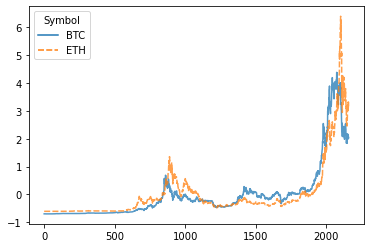

In [37]:
sns.lineplot(data=BTC_ETH_cap_scaled, alpha = .75)

- We can see that the logged 'close' price graph and the logged 'Market Cap' graph are very similar, this makes sence due to 'close' prices or price of an asset being a component of an assets market cap
- Market Cap is the calculation of an assets price times the volume of shares outstanding

***

## Moving Average
- We can use the moving average to find trends in volatile data

<AxesSubplot:xlabel='Date', ylabel='MA30'>

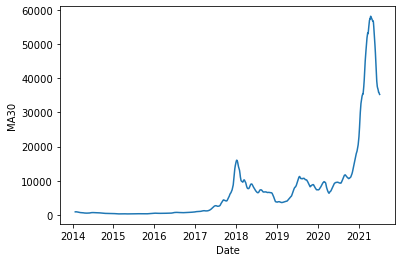

In [38]:
#30 & 100 Day Moving Avgerage
BTC['MA30'] = BTC['Close'].rolling(30).mean()
BTC['MA100'] = BTC['Close'].rolling(100).mean()

sns.lineplot(data = BTC, x= "Date", y= "MA30" )

<AxesSubplot:>

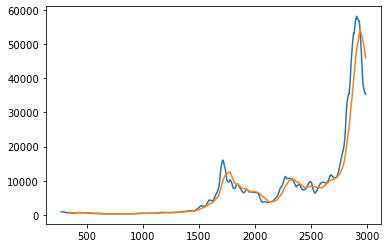

In [39]:
BTC['MA30'].plot()
BTC['MA100'].plot()


<AxesSubplot:xlabel='Date', ylabel='MA30'>

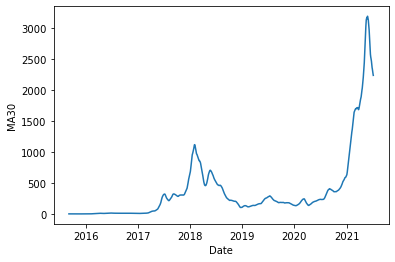

In [40]:
#30 & 100 Day Moving Average
ETH['MA30'] = ETH['Close'].rolling(30).mean()
ETH['MA100'] = ETH['Close'].rolling(100).mean()
sns.lineplot(data = ETH, x ="Date", y = "MA30")


<AxesSubplot:>

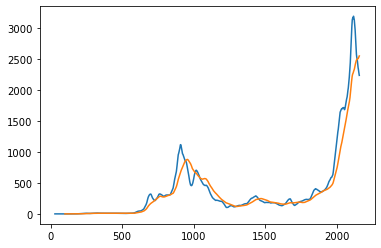

In [41]:
ETH['MA30'].plot()
ETH['MA100'].plot()

***

## Volatility

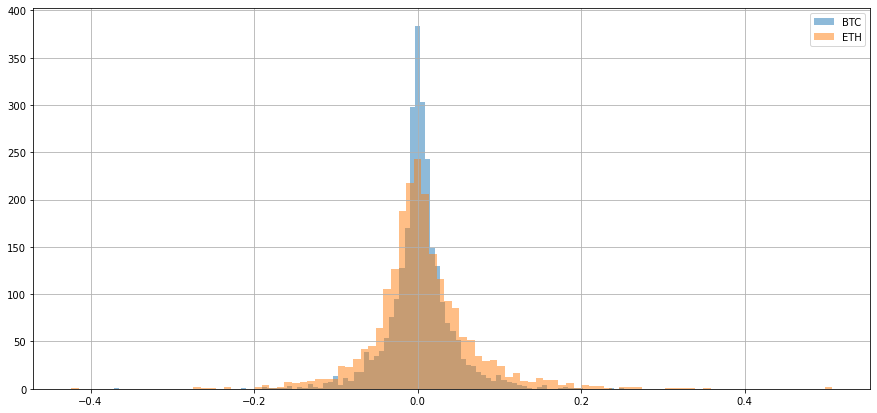

In [42]:
#Volatility
BTC['returns'] = (BTC['Close']/BTC['Close'].shift(1)) -1
ETH['returns'] = (ETH['Close']/ETH['Close'].shift(1))-1
BTC['returns'].hist(bins = 100, label = 'BTC', alpha = 0.5, figsize = (15,7))
ETH['returns'].hist(bins = 100, label = 'ETH', alpha = 0.5)

plt.legend()

- We can see that the percentage change in price for Ethereum has the wider histogram which indicates Ethereum is the more volatile crypto currency

# Random Forest Analysis
- Inorder to simplify the process of creating a decision tree we will convert some of the data to categorical data
- The new variables we will be using are:
    - profit = 1 if the current close price was higher than the day before, = 0 if otherwise
    - Volume Increase = 1 if the current trading volume was higher than the day before, = 0 if otherwise
    - Cap Increase = 1 if the current market cap is higher than the day before, = 0 if otherwise
    - MA30 Increase = 1 if the 30 day moving average for the current observation is higher than the previous days, = 0 if otherwise
    - Volatility Increase = 1 if the current day's volatility is higher than the previous day's, = 0 if otherwise
    
- We will be using profit as our outcome variable and we will be trying to determine which factors/ and which factors are the most insightful to determining if you would have mad profit on Bitcoin each day.

- We ended up having to drop Bitcoin's Volatility Increase and Cap Increase due to too much colinearity
- It was hard to find packages and documentation on using decision trees with time series data
- With this dataset I tried to make as many categorical variables as I could with the data I had
- With more time I was thinking about combining datasets with other variables and other categorical variables from other coins.

In [232]:
BTC = pd.read_csv('coin_Bitcoin.csv', parse_dates = ['Date'])

In [233]:
BTC.drop(columns = "Name", inplace = True)
BTC.drop(columns = "Sno", inplace = True)
BTC.drop(BTC.index[BTC['Volume'] == 0], inplace = True)

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
BTC['returns'] = (BTC['Close'] - BTC['Close'].shift(1))

In [236]:
BTC["profit"] = ""

In [237]:
BTC["profit"] = BTC.returns.where(BTC.returns < 0, 1)

In [238]:
BTC["profit"] = BTC.profit.where(BTC.profit == 1, 0)

In [239]:
BTC.dropna(inplace = True)

In [240]:
#print(BTC.head())

In [241]:
BTC["Volume_change"] = (BTC['Volume'] - BTC['Volume'].shift(1))
BTC.dropna(inplace = True)

In [242]:
BTC["Volume_increase"] = BTC.Volume_change.where(BTC.Volume_change < 0, 1)

In [243]:
BTC["Volume_increase"] = BTC.Volume_increase.where(BTC.Volume_increase == 1, 0)

In [244]:
#print(BTC.head())

In [245]:
BTC['returns'] = (BTC['Close']/BTC['Close'].shift(1)) -1

In [247]:
#print(BTC.head())

In [248]:
BTC["Cap_change"] = (BTC['Marketcap'] - BTC['Marketcap'].shift(1))
BTC.dropna(inplace = True)

In [249]:
BTC["Cap_increase"] = BTC.Cap_change.where(BTC.Cap_change < 0, 1)

In [250]:
BTC["Cap_increase"] = BTC.Cap_increase.where(BTC.Cap_increase == 1, 0)

In [251]:
#print(BTC.head())

In [252]:
BTC['MA30'] = BTC['Close'].rolling(30).mean()

In [253]:
BTC["MA30_change"] = (BTC['MA30'] - BTC['MA30'].shift(1))
BTC.dropna(inplace = True)

In [254]:
BTC["MA30_increase"] = BTC.MA30_change.where(BTC.MA30_change < 0, 1)

In [255]:
BTC["MA30_increase"] = BTC.MA30_increase.where(BTC.MA30_increase == 1, 0)

In [256]:
#print(BTC.head())

In [257]:
BTC['Volitility_change'] = (BTC['Close']/BTC['Close'].shift(1)) -1

In [258]:
BTC["Volitility_increase"] = BTC.Volitility_change.where(BTC.Volitility_change < 0, 1)

In [259]:
BTC["Volitility_increase"] = BTC.Volitility_increase.where(BTC.Volitility_increase == 1, 0)

***

In [366]:
ETH = pd.read_csv('coin_Ethereum.csv', parse_dates = ['Date'])

In [367]:
ETH.drop(columns = "Name", inplace = True)
ETH.drop(columns = "SNo", inplace = True)

In [368]:
ETH['MA30'] = ETH['Close'].rolling(30).mean()

In [369]:
BTC['ETH_returns'] = (ETH['Close'] - ETH['Close'].shift(1))

In [370]:
BTC["ETH_profit"] = BTC.ETH_returns.where(BTC.ETH_returns < 0, 1)

In [371]:
BTC["ETH_profit"] = BTC.ETH_profit.where(BTC.ETH_profit == 1, 0)

In [372]:
BTC["ETH_Volume_change"] = (ETH['Volume'] - ETH['Volume'].shift(1))
BTC.dropna(inplace = True)

In [373]:
BTC["ETH_Volume_increase"] = BTC.ETH_Volume_change.where(BTC.ETH_Volume_change < 0, 1)

In [374]:
BTC["ETH_Volume_increase"] = BTC.ETH_Volume_increase.where(BTC.ETH_Volume_increase == 1, 0)

In [375]:
BTC['ETH_returns'] = (BTC['Close']/BTC['Close'].shift(1)) -1

In [376]:
BTC["ETH_Cap_change"] = (ETH['Marketcap'] - ETH['Marketcap'].shift(1))
BTC.dropna(inplace = True)

In [377]:
BTC["ETH_Cap_increase"] = BTC.ETH_Cap_change.where(BTC.ETH_Cap_change < 0, 1)

In [379]:
BTC["ETH_Cap_increase"] = BTC.ETH_Cap_increase.where(BTC.ETH_Cap_increase == 1, 0)

In [380]:
BTC["ETH_MA30_change"] = (ETH['MA30'] - ETH['MA30'].shift(1))
BTC.dropna(inplace = True)

In [381]:
BTC["ETH_MA30_increase"] = BTC.ETH_MA30_change.where(BTC.ETH_MA30_change < 0, 1)

In [382]:
BTC["ETH_MA30_increase"] = BTC.ETH_MA30_increase.where(BTC.ETH_MA30_increase == 1, 0)

In [383]:
BTC['ETH_Volitility_change'] = (ETH['Close']/ETH['Close'].shift(1)) -1

In [384]:
BTC["ETH_Volitility_increase"] = BTC.ETH_Volitility_change.where(BTC.ETH_Volitility_change < 0, 1)

In [385]:
BTC["ETH_Volitility_increase"] = BTC.ETH_Volitility_increase.where(BTC.ETH_Volitility_increase == 1, 0)

In [386]:
BTC.dropna(inplace = True)

In [387]:
print(BTC.head())

    Symbol       Date        High         Low        Open       Close  \
277    BTC 2014-01-31  831.869995  812.599976  818.429993  829.919983   
278    BTC 2014-02-01  853.520019  827.109985  828.609985  832.580017   
279    BTC 2014-02-02  844.719971  820.669983  832.900024  825.369995   
280    BTC 2014-02-03  826.479981  807.219971  824.080017  823.830017   
281    BTC 2014-02-04  840.169983  820.940002  823.770019  827.960022   

         Volume     Marketcap   returns  profit  ...  ETH_returns  ETH_profit  \
277  17107900.0  1.023841e+10  0.013296     1.0  ...     0.013296         1.0   
278  19668700.0  1.027520e+10  0.003205     1.0  ...     0.003205         1.0   
279  11300900.0  1.019004e+10 -0.008660     0.0  ...    -0.008660         1.0   
280  13940100.0  1.017477e+10 -0.001866     0.0  ...    -0.001866         0.0   
281  16609700.0  1.022934e+10  0.005013     1.0  ...     0.005013         0.0   

     ETH_Volume_change  ETH_Volume_increase  ETH_Cap_change  ETH_Cap_incre

In [428]:
BTC_tree = BTC[['profit', 'Volume_increase', 'MA30_increase','ETH_profit', 'ETH_Volume_increase', 'ETH_Cap_increase', 'ETH_MA30_increase', 'ETH_Volitility_increase']]
#print(BTC_tree)


In [389]:
print(BTC_tree.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1883 entries, 277 to 2159
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   profit                   1883 non-null   float64
 1   Volume_increase          1883 non-null   float64
 2   MA30_increase            1883 non-null   float64
 3   ETH_profit               1883 non-null   float64
 4   ETH_Volume_increase      1883 non-null   float64
 5   ETH_Cap_increase         1883 non-null   float64
 6   ETH_MA30_increase        1883 non-null   float64
 7   ETH_Volitility_increase  1883 non-null   float64
dtypes: float64(8)
memory usage: 132.4 KB
None


In [429]:
BTC_tree.reset_index()

,index,profit,Volume_increase,MA30_increase,ETH_profit,ETH_Volume_increase,ETH_Cap_increase,ETH_MA30_increase,ETH_Volitility_increase
0,277,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,278,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,279,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,280,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,281,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1878,2155,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1879,2156,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1880,2157,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
1881,2158,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [430]:
from sklearn.model_selection import train_test_split

In [432]:
BTC_tree = BTC_tree.rename(columns = {'profit': 'label'})

In [433]:
BTC_tree['label'].value_counts()

1.0    1011
0.0     872
Name: label, dtype: int64

In [434]:
labels = np.array(BTC_tree.pop('label'))

In [435]:
train, test, train_labels, test_labels = train_test_split(BTC_tree, labels, 
                                                          stratify = labels,
                                                          test_size = 0.25)                                                          

In [436]:
features = list(train.columns)

In [437]:
print(train.shape)

(1412, 7)


In [400]:
print(test.shape)

(471, 7)


In [438]:
#print(train)

In [404]:
#test.value_counts()

In [439]:
tree = DecisionTreeClassifier()

In [440]:
tree.fit(train, train_labels)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

Decision tree has 67 nodes with maximum depth 6.


In [441]:
print(tree.predict_proba(train))

[[0.32352941 0.67647059]
 [0.39655172 0.60344828]
 [0.32352941 0.67647059]
 ...
 [0.48148148 0.51851852]
 [0.45614035 0.54385965]
 [0.41666667 0.58333333]]


In [442]:
# Make probability predictions
train_probs = tree.predict_proba(train)[:, 1]
probs = tree.predict_proba(test)[:, 1]

train_predictions = tree.predict(train)
predictions = tree.predict(test)

In [443]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(test_labels, probs)}')

Train ROC AUC Score: 0.6171499923345678
Test ROC AUC  Score: 0.5930032273271204


In [444]:
print(f'Baseline ROC AUC: {roc_auc_score(test_labels, [1 for _ in range(len(test_labels))])}')

Baseline ROC AUC: 0.5


In [445]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = .5
    
    #baseline is everyone has good health
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');


In [446]:
from collections import Counter
print(Counter(probs))
print(Counter(predictions))

Counter({0.6764705882352942: 23, 0.6101694915254238: 23, 0.603448275862069: 22, 0.5833333333333334: 21, 0.5909090909090909: 20, 0.43859649122807015: 19, 0.5185185185185185: 19, 0.46153846153846156: 18, 0.47619047619047616: 18, 0.4838709677419355: 17, 0.4492753623188406: 17, 0.6923076923076923: 17, 0.55: 17, 0.5483870967741935: 17, 0.56: 16, 0.717391304347826: 16, 0.71875: 16, 0.4375: 16, 0.75: 14, 0.543859649122807: 14, 0.4883720930232558: 13, 0.6097560975609756: 13, 0.6071428571428571: 13, 0.5714285714285714: 11, 0.34210526315789475: 11, 0.5: 9, 0.42857142857142855: 9, 0.35: 9, 0.5319148936170213: 9, 0.5128205128205128: 8, 0.2894736842105263: 6})
Counter({1.0: 309, 0.0: 162})


Recall Baseline: 1.0 Test: 0.7 Train: 0.67
Precision Baseline: 0.54 Test: 0.57 Train: 0.6
Roc Baseline: 0.5 Test: 0.59 Train: 0.62


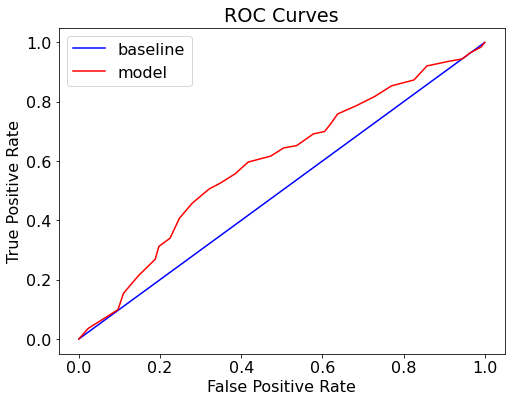

In [447]:
evaluate_model(predictions, probs, train_predictions, train_probs)

In [448]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[ 86 132]
 [ 76 177]]


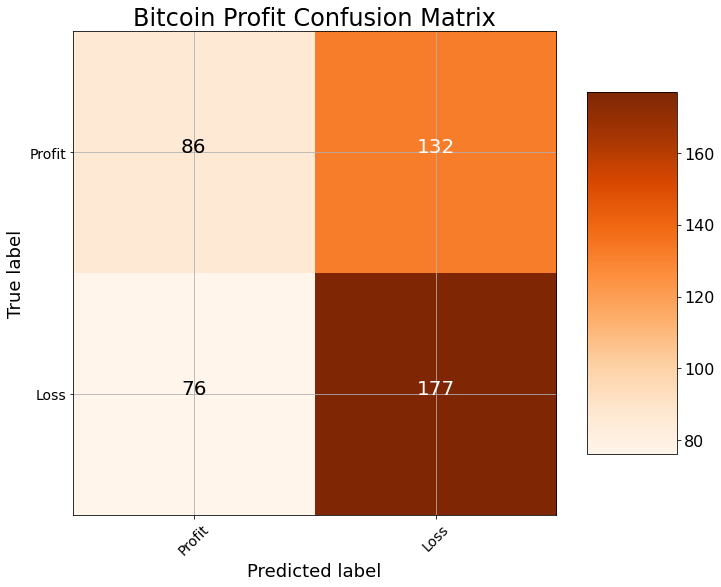

In [449]:
cm = confusion_matrix(test_labels, predictions)
plot_confusion_matrix(cm, classes = [ 'Profit', 'Loss'],
                      title = 'Bitcoin Profit Confusion Matrix')

- We seem to be defaulting to predicting losses more than predicting a profit
- When dealing crypto currencies in this current market environment that would be a good strategy

In [450]:
fi = pd.DataFrame({'feature': features,
                   'importance': tree.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head()

,feature,importance
1,MA30_increase,0.452296
5,ETH_MA30_increase,0.157997
0,Volume_increase,0.149901
3,ETH_Volume_increase,0.101806
2,ETH_profit,0.085103


- It seams that Bitcoins 30 day maving average is a leading indicator of proffiting on Bitcoin tomorrow by a wide margin

[Text(697.5, 978.48, 'MA30_increase <= 0.5\ngini = 0.497\nsamples = 1412\nvalue = [654, 758]'),
 Text(348.75, 761.0400000000001, 'ETH_profit <= 0.5\ngini = 0.497\nsamples = 659\nvalue = [355, 304]'),
 Text(174.375, 543.6, 'ETH_Volume_increase <= 0.5\ngini = 0.493\nsamples = 314\nvalue = [176, 138]'),
 Text(87.1875, 326.1600000000001, 'Volume_increase <= 0.5\ngini = 0.495\nsamples = 169\nvalue = [93, 76]'),
 Text(43.59375, 108.72000000000003, '\n  (...)  \n'),
 Text(130.78125, 108.72000000000003, '\n  (...)  \n'),
 Text(261.5625, 326.1600000000001, 'Volume_increase <= 0.5\ngini = 0.49\nsamples = 145\nvalue = [83, 62]'),
 Text(217.96875, 108.72000000000003, '\n  (...)  \n'),
 Text(305.15625, 108.72000000000003, '\n  (...)  \n'),
 Text(523.125, 543.6, 'ETH_Volume_increase <= 0.5\ngini = 0.499\nsamples = 345\nvalue = [179, 166]'),
 Text(435.9375, 326.1600000000001, 'Volume_increase <= 0.5\ngini = 0.5\nsamples = 164\nvalue = [82, 82]'),
 Text(392.34375, 108.72000000000003, '\n  (...)  \n'),

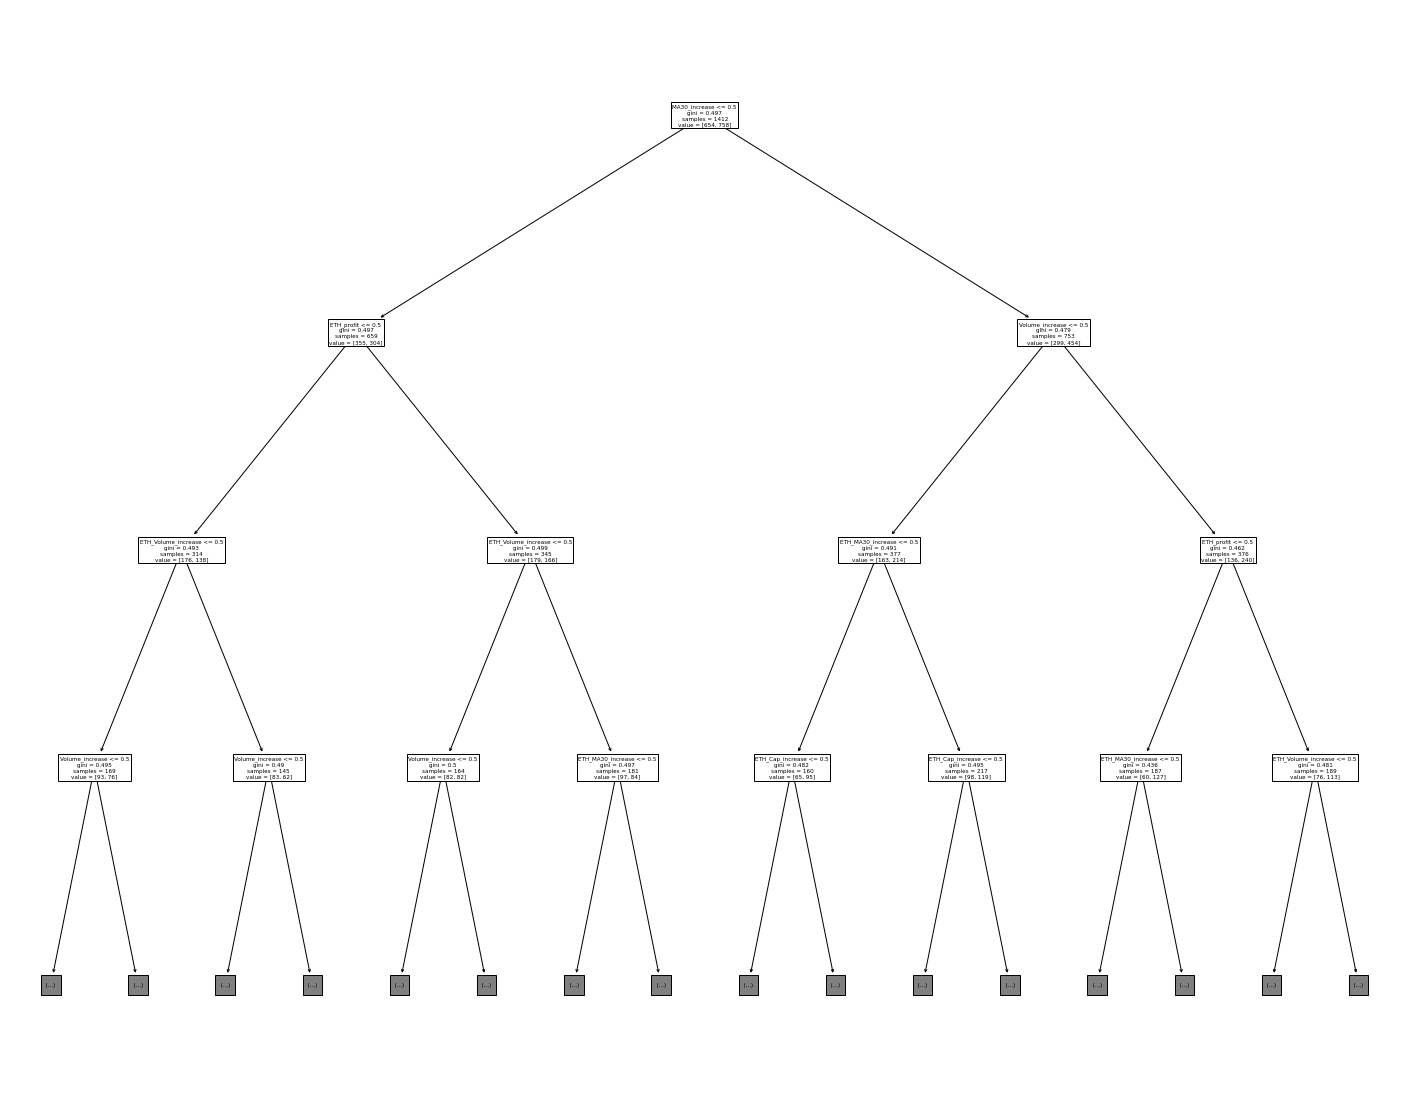

In [451]:
import subprocess
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from PIL import Image
#from subprocess import check_call
# Save tree as dot file
#export_graphviz(tree, 'tree_real_data.dot', rounded = True, 
#                feature_names = features, max_depth = 6,
#                class_names = ['poor health', 'good health'], filled = True)

# Convert to png
#subprocess.call(['dot', '-Tpng', 'tree_real_data.dot', '-o', 'tree_real_data.png', '-Gdpi=200'])

#tree.export_graphviz(model_name,'m1_ent.dot',filled=True,feature_names=features,
#                     class_names= classes)

#convert dot into image
#subprocess.check_call(['dot','-Tpng','tree_real_data.dot','-0','tree_real_data.png'])

# Visualize
#Image(filename='tree_real_data.png')
fig = plt.figure(figsize=(25,20))
plot_tree(tree, max_depth=3, feature_names = features)

In [452]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100,  
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1,
                              class_weight='balanced')

# Fit on training data
model.fit(train, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestClassifier(class_weight='balanced', max_features='sqrt', n_jobs=-1,
                       verbose=1)

In [453]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 65
Average maximum depth 5


In [454]:
train_rf_predictions = model.predict(train)
train_rf_probs = model.predict_proba(train)[:, 1]

rf_predictions = model.predict(test)
rf_probs = model.predict_proba(test)[:, 1]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


Recall Baseline: 1.0 Test: 0.64 Train: 0.57
Precision Baseline: 0.54 Test: 0.6 Train: 0.62
Roc Baseline: 0.5 Test: 0.59 Train: 0.62


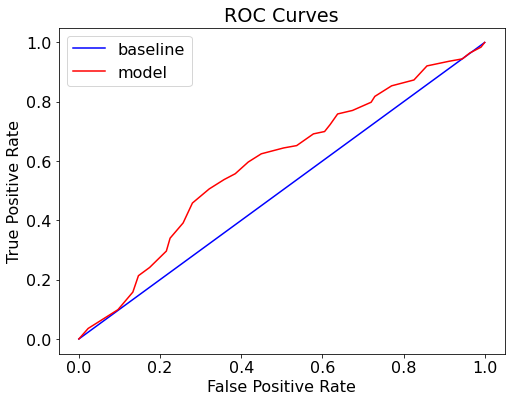

In [455]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Confusion matrix, without normalization
[[117 101]
 [120 133]]


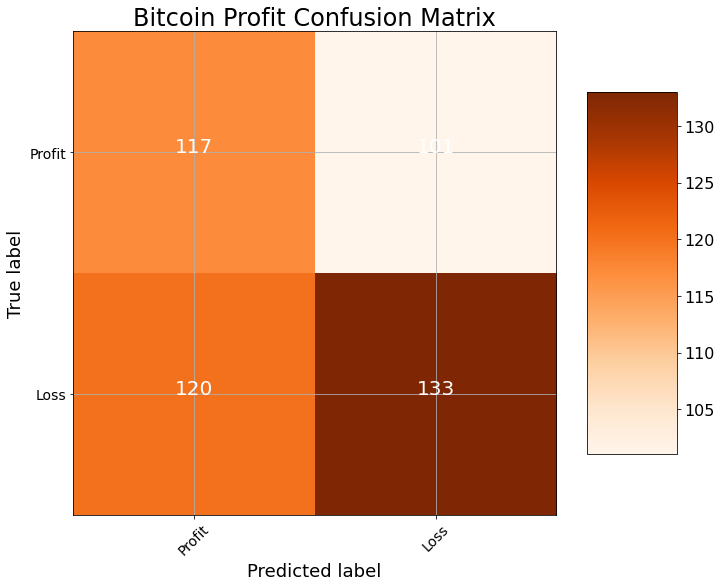

In [424]:
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = [ 'Profit', 'Loss'],
                      title = 'Bitcoin Profit Confusion Matrix')

We over predicted days we would lose money. This might be a good thing. A dollar lost is hurts more than the joy of gaining a dollar, so it seams the algorithm was playing it safe. 

In [427]:
fi_model = pd.DataFrame({'feature': features,
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_model.head()

,feature,importance
1,MA30_increase,0.352610
0,Volume_increase,0.220544
5,ETH_MA30_increase,0.198136
3,ETH_Volume_increase,0.152022
4,ETH_Cap_increase,0.029066


It seams that the general trend, the 30 day moving average metric is the best predictor of profitting on Bitcoin tomorrow. I predicted that metrics from Ethereum would have higher significance since the coins seem to be coupled, however, it seems like I was wrong.

# Conclusion For Decision Tree
- Recall Baseline: 1.0 Test: 0.64 Train: 0.57
- Precision Baseline: 0.54 Test: 0.6 Train: 0.62
- Roc Baseline: 0.5 Test: 0.59 Train: 0.62

From this we can conclude that we were 64% accurate when predicting the days we would have made profit, however, out of the total days we said we would profit only 60% of those days we would have been correct
We barely beat the baseline, however, this is the best we could have done given the little data that we had
Crypto is a highly volatile and speculative market, predicting profitable days over a long stretch is practically impossible

***

# Using a Recurring Neural Network (RNN) and a Long Short-Term Memory (LSTM) to forecast Bitcoin and Etherium prices

#### What is a RNN?
- Is a neural network that takes in to consideration the order of observations
- Used for time-series data
- RNN have feedback loop that lets the network maintain information in it's "memory" 
- However it has a memory probelm during back-propigation through time
- Prone to exploding and vanishing gradients during back-propigation


#### What is a LSTM? 
- Introduces a more complicated process during forward propigation
- Introduces "gates"
- These gates will transform the cell state for time steps with relevant information that should be passed to the next time step
- Resolves RNN issues with constant back flow of the error

#### For this portion of the analysis we will be only looking at a time-series of Bitcoin's "Close" price 

In [456]:
BTC_RNN = pd.read_csv('coin_Bitcoin.csv', usecols = ['Date','Close'], parse_dates = ['Date'], header=0, index_col=0)
print(BTC_RNN.head())

                 Close
Date                  
2013-04-29  144.539993
2013-04-30  139.000000
2013-05-01  116.989998
2013-05-02  105.209999
2013-05-03   97.750000


In [457]:
close_train=BTC_RNN.iloc[:len(BTC_RNN)-100]
close_test=BTC_RNN.iloc[len(close_train):]

- We split the data into a train and test dataset
- The train dataset with contain all the data execpt the last 100 observations in the original dataset
- The test dataset will contain the last 100 observations in the original dataset

In [458]:
close_train=np.array(close_train)
close_train=close_train.reshape(close_train.shape[0],1)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close_scaled=scaler.fit_transform(close_train)

- We will scale the data using a standard MinMax scale

In [460]:
timestep=100
x_train=[]
y_train=[]

for i in range(timestep,close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) 
#reshaped for RNN
print("x_train shape= ",x_train.shape)
print("y_train shape= ",y_train.shape)

x_train shape=  (2791, 100, 1)
y_train shape=  (2791,)


In [461]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten

regressor=Sequential()
#first RNN layer

regressor.add(SimpleRNN(128,activation="relu",return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.25))
#second RNN layer

regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))

regressor.add(SimpleRNN(128,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))

#convert the matrix to 1-line
regressor.add(Flatten())

#output layer
regressor.add(Dense(1))

regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(x_train,y_train,epochs=20,batch_size=64)

Epoch 1/20
44/44 [==============================] - 5s 94ms/step - loss: 0.0116
Epoch 2/20
44/44 [==============================] - 4s 97ms/step - loss: 8.7662e-04
Epoch 3/20
44/44 [==============================] - 4s 95ms/step - loss: 8.9503e-04
Epoch 4/20
44/44 [==============================] - 4s 102ms/step - loss: 6.9989e-04
Epoch 5/20
44/44 [==============================] - 5s 102ms/step - loss: 6.4904e-04
Epoch 6/20
44/44 [==============================] - 4s 102ms/step - loss: 5.4594e-04
Epoch 7/20
44/44 [==============================] - 4s 101ms/step - loss: 5.9315e-04
Epoch 8/20
44/44 [==============================] - 4s 100ms/step - loss: 5.4570e-04
Epoch 9/20
44/44 [==============================] - 4s 99ms/step - loss: 5.9034e-04
Epoch 10/20
44/44 [==============================] - 4s 100ms/step - loss: 6.2983e-04
Epoch 11/20
44/44 [==============================] - 4s 100ms/step - loss: 5.2452e-04
Epoch 12/20
44/44 [==============================] - 4s 101ms/step - lo

- We then use the SimpleRNN function to pass the data through the neural net, will be using ReLU for the activation in the hidden layer

In [462]:
inputs=BTC_RNN[len(BTC_RNN)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [463]:
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [464]:
predicted_data=regressor.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)

4/4 [==============================] - 0s 16ms/step


In [465]:
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

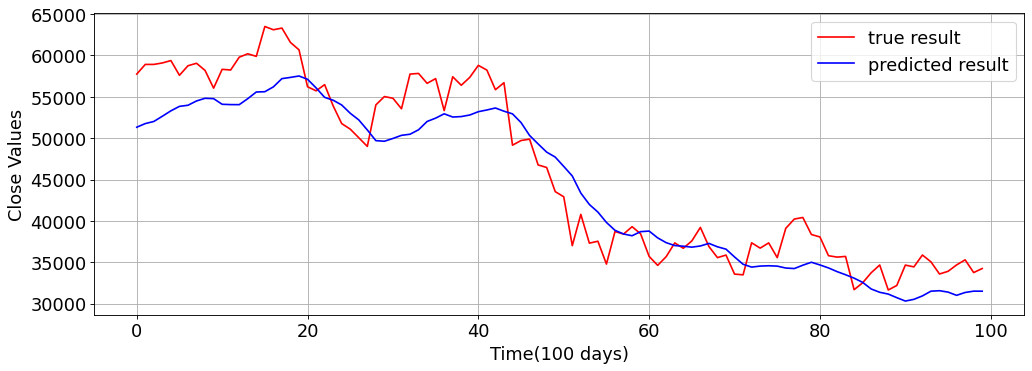

In [466]:
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(100 days)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()

## RNN Model Results
- We can see that the predicted data follows the general trends of the actual data, however, the distance between the predicted and actual data is 1000's of dollars

In [473]:
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,Flatten

model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
88/88 [==============================] - 2s 12ms/step - loss: 0.0028
Epoch 2/20
88/88 [==============================] - 1s 12ms/step - loss: 2.3220e-04
Epoch 3/20
88/88 [==============================] - 1s 12ms/step - loss: 2.0175e-04
Epoch 4/20
88/88 [==============================] - 1s 11ms/step - loss: 1.9053e-04
Epoch 5/20
88/88 [==============================] - 1s 11ms/step - loss: 1.8847e-04
Epoch 6/20
88/88 [==============================] - 1s 12ms/step - loss: 1.8449e-04
Epoch 7/20
88/88 [==============================] - 1s 12ms/step - loss: 1.7104e-04
Epoch 8/20
88/88 [==============================] - 1s 12ms/step - loss: 1.6806e-04
Epoch 9/20
88/88 [==============================] - 1s 12ms/step - loss: 1.6445e-04
Epoch 10/20
88/88 [==============================] - 1s 11ms/step - loss: 1.5455e-04
Epoch 11/20
88/88 [==============================] - 1s 12ms/step - loss: 1.5494e-04
Epoch 12/20
88/88 [==============================] - 1s 12ms/step - loss: 1.42

In [474]:
inputs=BTC_RNN[len(BTC_RNN)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [475]:
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [476]:
predicted_data=model.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)

4/4 [==============================] - 0s 7ms/step


In [477]:
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

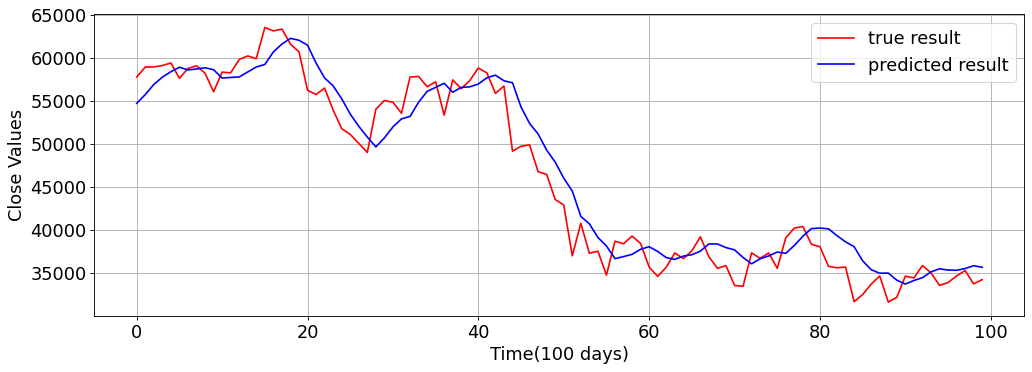

In [478]:
plt.figure(figsize=(15,5), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="r",label="true result")
plt.plot(predicted_data,color="b",label="predicted result")
plt.legend()
plt.xlabel("Time(100 days)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()

## LSTM Model Results

- In the LSTM model the predicted results are much closer than compared to the RNN forecast
- The difference between the actual and predicted values could be the difference of 100's of dollars instead of 1000's
- The model is still not worthy to be used as a algorithm to optimize crypto currency trading